In [ ]:
## python version recommended 3.7.3

%pip install numpy==1.21.2 opencv-contrib-python==3.4.2.16 opencv-python==3.4.2.16 opencv-python-headless==4.3.0.36
%pip install matplotlib==3.0.3 requests rasterio==1.3.2
%pip install tqdm

In [ ]:
"""
For Windows Users - Preventing GDAL errors 

1) Go to https://www.lfd.uci.edu/~gohlke/pythonlibs/ and download the appropriate GDAL and rasterio .whl files. 
   The .whl files are named based on the Python version (e.g., cp39 == Python 3.9) and Windows architecture (e.g. amd64 = 64bit)

2) In the command prompt, activate your Python env. and go to the directory where the .whl files have been downloaded. 

3) pip install gdal .whl file first, followed by the rasterio. 

NOTE: 

If you have ArcPy in the same conda/pythonenv environment and intend to import both packages at the same time in a script, 
you must import arcpy first before rasterio. Importing rasterio on its own without the use of ArcPy is fine. 

"""

In [6]:
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
import requests
import shutil
import os
import rasterio
from tqdm import tqdm_notebook

In [2]:
# download inputs:
#     This is just for example. The actual data can be downloaded from the provoded links to the performers!

# Code for downloading image from a url
input_test_data_url='https://raw.githubusercontent.com/nasa-jpl/USGS-DARPA-challange-resources/main/test_data2.zip'
test_data = requests.get(input_test_data_url).content
with open('test_data2.zip', 'wb') as handler:
    handler.write(test_data)
# unzip
shutil.unpack_archive('test_data2.zip', '.', 'zip')

In [3]:
# create directory to store results
os.makedirs('results', exist_ok=True)

<ipython-input-8-74d82517d704>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file_name in tqdm_notebook(os.listdir(data_dir)):


  0%|          | 0/4 [00:00<?, ?it/s]

Working on map: AZ_Arivaca_314329_1941_62500_geo_mosaic.tif


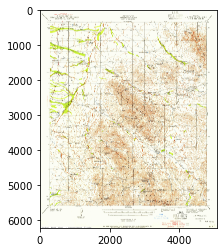

using the following legend feature for matching...:


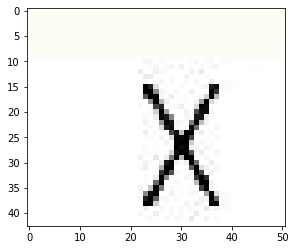

detecting for label: 3_pt
type: pt
match found:


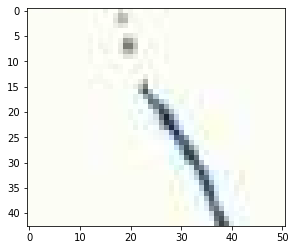

match found:


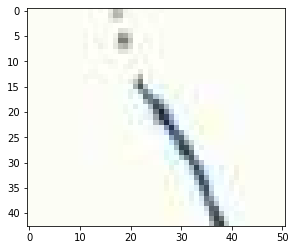

match found:


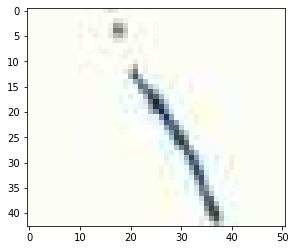

match found:


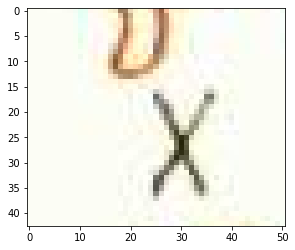

match found:


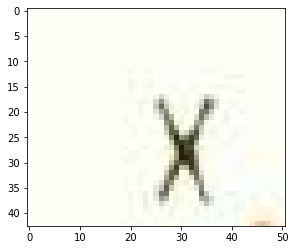

match found:


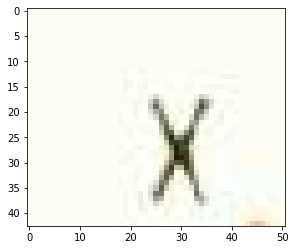

match found:


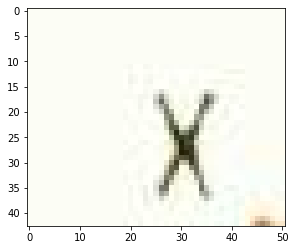

match found:


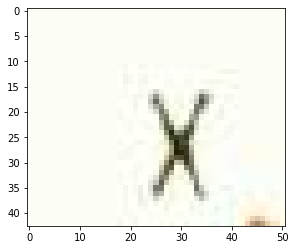

match found:


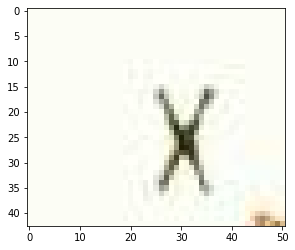

match found:


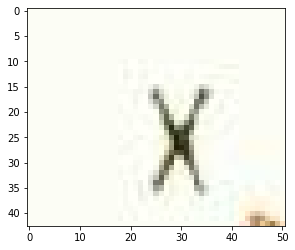

match found:


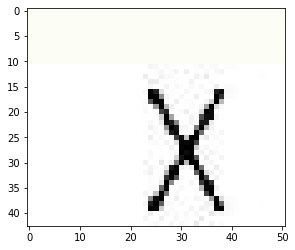

match found:


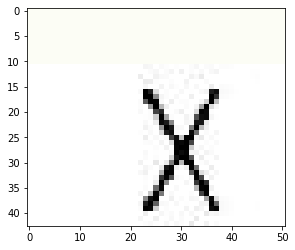

match found:


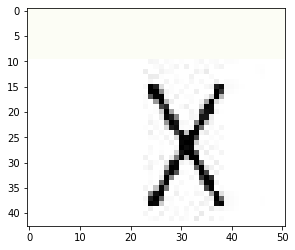

match found:


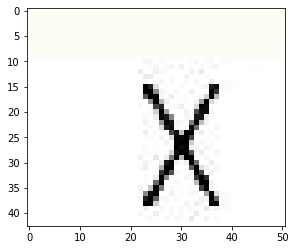

match found:


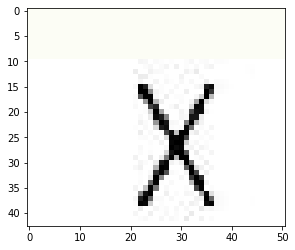

match found:


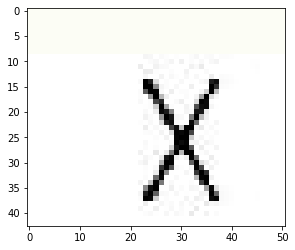

match found:


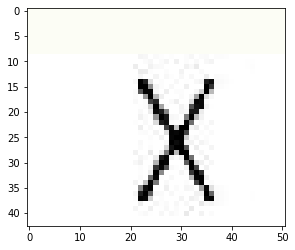

predicted binary raster:
shape: (6225, 5088)
unique value(s): [0. 1.]


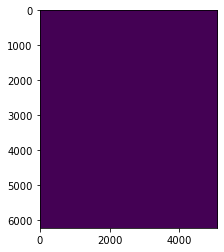

C:\Users\adardas\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\comb_env\lib\site-packages\rasterio\__init__.py:238: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  s = writer(path, mode, driver=driver,


using the following legend feature for matching...:


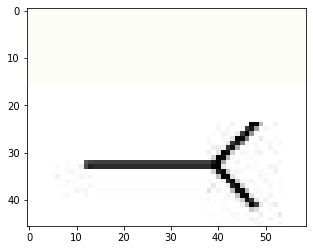

detecting for label: 4_pt
type: pt
match found:


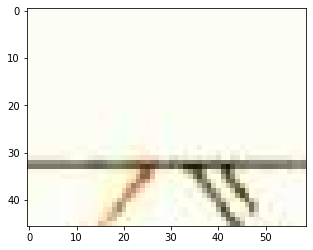

match found:


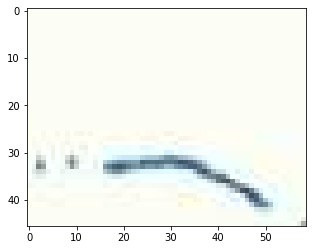

match found:


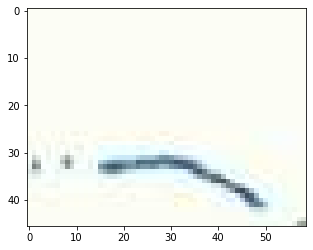

match found:


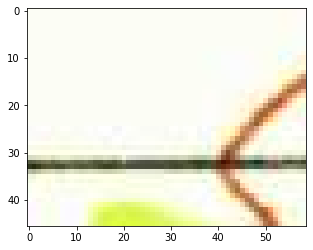

match found:


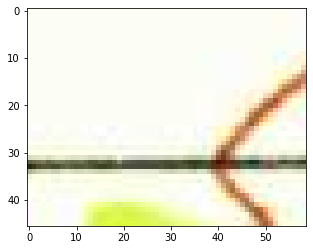

match found:


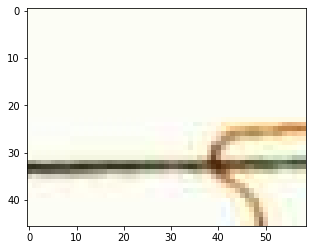

match found:


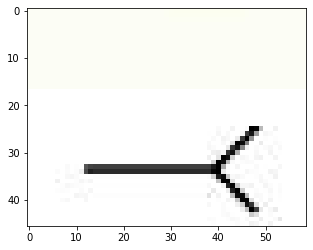

match found:


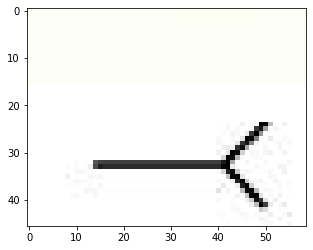

match found:


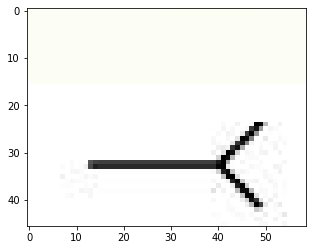

match found:


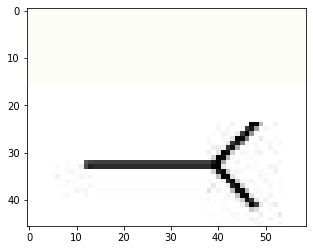

match found:


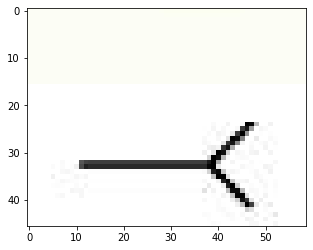

match found:


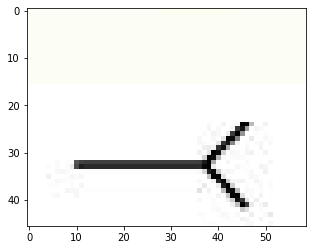

match found:


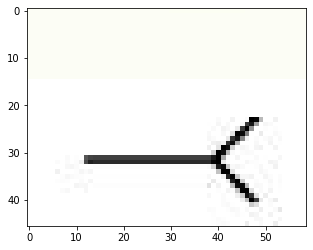

predicted binary raster:
shape: (6225, 5088)
unique value(s): [0. 1.]


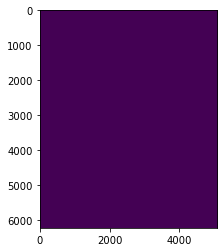

using the following legend feature for matching...:


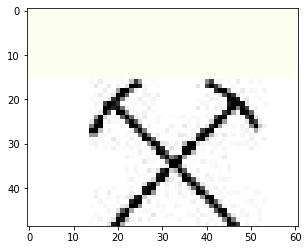

detecting for label: 5_pt
type: pt
match found:


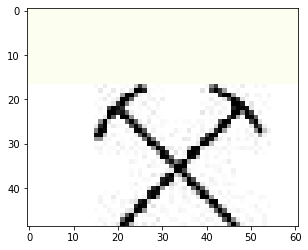

match found:


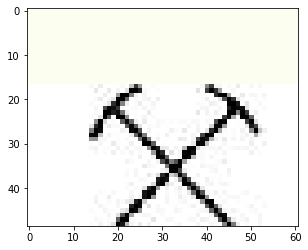

match found:


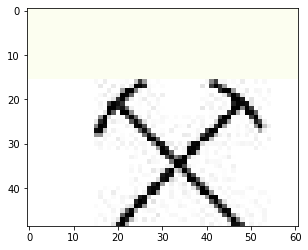

match found:


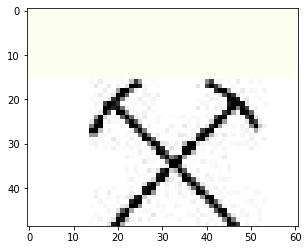

match found:


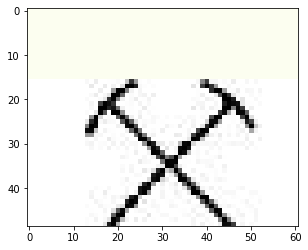

match found:


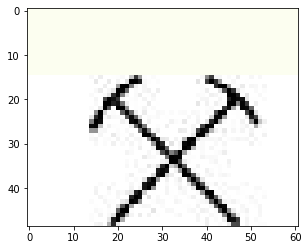

match found:


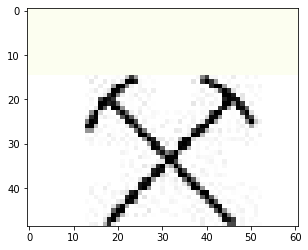

predicted binary raster:
shape: (6225, 5088)
unique value(s): [0. 1.]


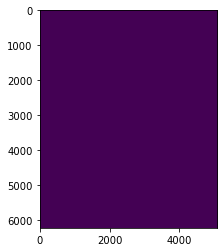

Working on map: OG2.tif


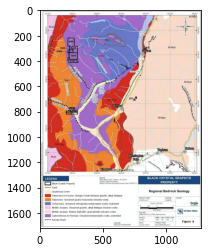

using the following legend feature for matching...:


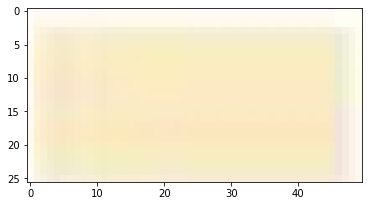

detecting for label: Qcr_poly
type: poly
matching the color: [250, 236, 199]
predicted binary raster:
shape: (1718, 1276)
unique value(s): [0.]


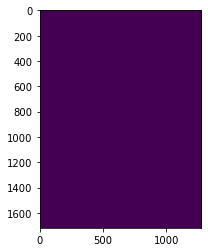

using the following legend feature for matching...:


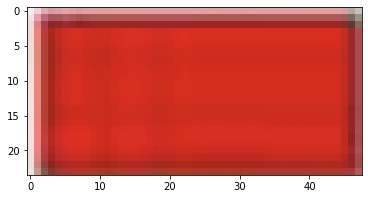

detecting for label: PeShgr_poly
type: poly
matching the color: [207, 45, 33]
predicted binary raster:
shape: (1718, 1276)
unique value(s): [0.]


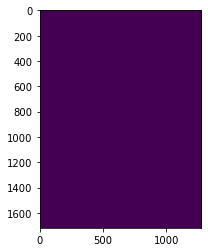

using the following legend feature for matching...:


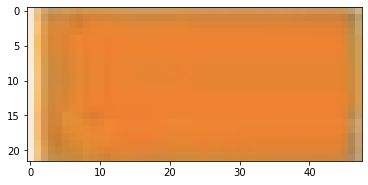

detecting for label: Peqm_poly
type: poly
matching the color: [232, 132, 51]
predicted binary raster:
shape: (1718, 1276)
unique value(s): [0. 1.]


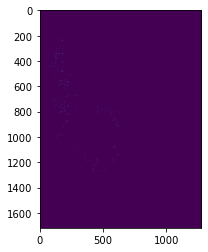

using the following legend feature for matching...:


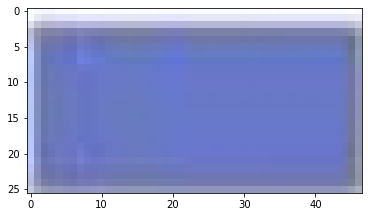

detecting for label: Kog_poly
type: poly
matching the color: [106, 120, 197]
predicted binary raster:
shape: (1718, 1276)
unique value(s): [0. 1.]


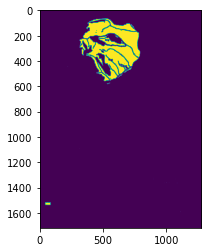

using the following legend feature for matching...:


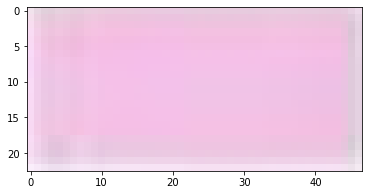

detecting for label: MJgr_poly
type: poly
matching the color: [241, 194, 229]
predicted binary raster:
shape: (1718, 1276)
unique value(s): [0.]


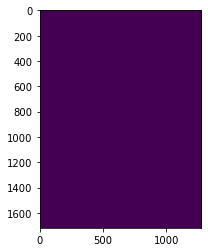

using the following legend feature for matching...:


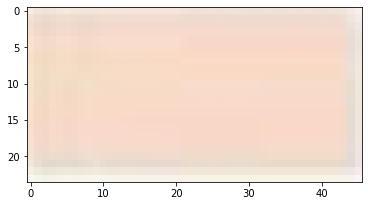

detecting for label: MJNgd_poly
type: poly
matching the color: [246, 219, 201]
predicted binary raster:
shape: (1718, 1276)
unique value(s): [0.]


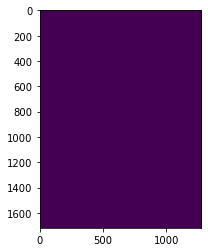

using the following legend feature for matching...:


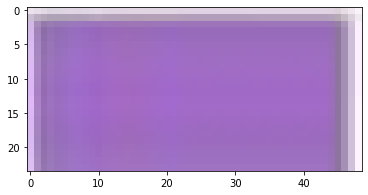

detecting for label: Cpm_poly
type: poly
matching the color: [159, 109, 194]
predicted binary raster:
shape: (1718, 1276)
unique value(s): [0. 1.]


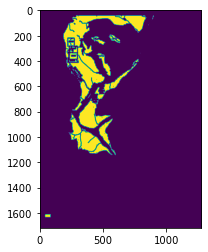

using the following legend feature for matching...:


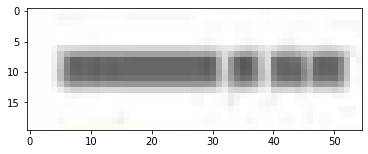

detecting for label: Fault_line
type: line
detecting lines in the legend feature...


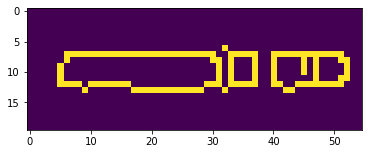

matching the color: [232, 232, 232]
predicted binary raster:
shape: (1718, 1276)
unique value(s): [0. 1.]


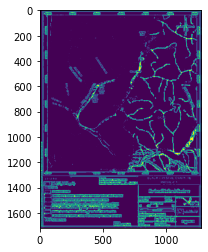

using the following legend feature for matching...:


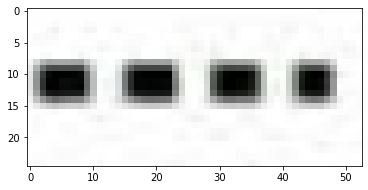

detecting for label: AccessRd_line
type: line
detecting lines in the legend feature...


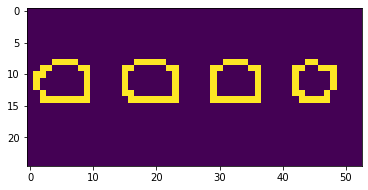

matching the color: [164, 167, 166]
predicted binary raster:
shape: (1718, 1276)
unique value(s): [0. 1.]


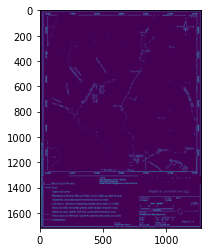

In [8]:

data_dir='test_data2'
for file_name in tqdm_notebook(os.listdir(data_dir)):

    # get the .tif files
    if '.tif' in file_name:
        filename=file_name.replace('.tif', '')
        print('Working on map:', file_name)
        file_path=os.path.join(data_dir, file_name)
        test_json=file_path.replace('.tif', '.json')
        
        # read the legend annotation file
        with open(test_json) as f:
            data = json.load(f)

        # load image into an array
        im=cv2.imread(file_path)
        im=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        plt.imshow(im)
        plt.show()

        for shape in data['shapes']:

            # read labels and bounding box coordinates
            label = shape['label']
            points = shape['points']
            xy_min, xy_max = points
            x_min, y_min = xy_min
            x_max, y_max = xy_max
            
            template = im[int(y_min):int(y_max), int(x_min):int(x_max)]
            h, w = template.shape[0], template.shape[1]
            print('using the following legend feature for matching...:')
            plt.imshow(template)
            plt.show()
            
            print('detecting for label:', label)
            typ=label.split('_')[-1]
            print('type:', typ)
            
            
            ## To match point shapes
            if typ=='pt':
                
                # find all the template matches in the basemap
                res = cv2.matchTemplate(im, template,cv2.TM_CCOEFF_NORMED)
                threshold = 0.55
                loc = np.where( res >= threshold)
                
                # use the bounding boxes to create prediction binary raster
                pred_binary_raster=np.zeros((im.shape[0], im.shape[1]))
                for pt in zip(*loc[::-1]):
                    print('match found:')
                    pred_binary_raster[int(pt[1]+float(h)/2), pt[0] + int(float(w)/2)]=1
                    plt.imshow(im[pt[1]:pt[1] + h, pt[0]:pt[0] + w])
                    plt.show()

            
            ## To match lines and polygons
            else:
                
                if typ=='line':
                    # do edge detection
                    print('detecting lines in the legend feature...')
                    gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
                    edges = cv2.Canny(gray, threshold1=30, threshold2=100)
                    plt.imshow(edges)
                    plt.show()
                    central_pixel=tuple(np.argwhere(edges==255)[0])
                    sought = template[central_pixel].tolist()
                else: # type=='poly'
                    # take the median of the colors to find the predominant color
                    r=int(np.median(template[:,:,0]))
                    g=int(np.median(template[:,:,1]))
                    b=int(np.median(template[:,:,2]))
                    sought=[r, g, b]
                
                print('matching the color:', sought)
                
                # capture the variations of legend color due to scanning errors
                color_range=20
                lower = np.array([x - color_range for x in sought], dtype="uint8")
                upper = np.array([x + color_range for x in sought], dtype="uint8")
                
                # create a mask to only preserve current legend color in the basemap
                mask = cv2.inRange(im, lower, upper)
                detected = cv2.bitwise_and(im, im, mask=mask)
                
                # convert to grayscale 
                detected_gray = cv2.cvtColor(detected, cv2.COLOR_BGR2GRAY)
                img_bw = cv2.threshold(detected_gray, 127, 255, cv2.THRESH_BINARY)[1]
                
                # convert the grayscale image to binary image
                pred_binary_raster = img_bw.astype(float) / 255
            
            # print
            print('predicted binary raster:')
            print('shape:', pred_binary_raster.shape)
            print('unique value(s):', np.unique(pred_binary_raster))

            # plot the raster and save it
            plt.imshow(pred_binary_raster)
            plt.show()
            
            # save the raster into a .tif file
            out_file_path=os.path.join('results', filename+'_'+label+'.tif')
            pred_binary_raster=pred_binary_raster.astype('uint16')
            cv2.imwrite(out_file_path, pred_binary_raster)
            
            # convert the image to a binary raster .tif
            raster = rasterio.open(out_file_path)
            transform = raster.transform
            array     = raster.read(1)
            crs       = raster.crs 
            width     = raster.width 
            height    = raster.height 
            
            raster.close()
            
            with rasterio.open(out_file_path, 'w', 
                               driver    = 'GTIFF', 
                               transform = transform, 
                               dtype     = rasterio.uint8, 
                               count     = 1, 
                               compress  = 'lzw', 
                               crs       = crs, 
                               width     = width, 
                               height    = height) as dst:
                
                dst.write(array, indexes=1)
                dst.close()
            

file_path: results\AZ_Arivaca_314329_1941_62500_geo_mosaic_3_pt.tif
[0 1] (6225, 5088, 3)


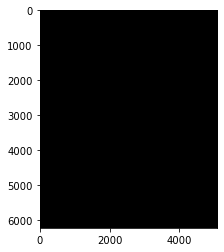

file_path: results\AZ_Arivaca_314329_1941_62500_geo_mosaic_4_pt.tif
[0 1] (6225, 5088, 3)


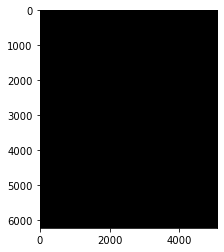

file_path: results\AZ_Arivaca_314329_1941_62500_geo_mosaic_5_pt.tif
[0 1] (6225, 5088, 3)


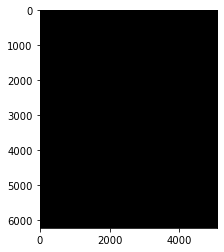

file_path: results\OG2_AccessRd_line.tif
[0 1] (1718, 1276, 3)


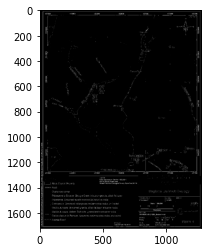

file_path: results\OG2_Cpm_poly.tif
[0 1] (1718, 1276, 3)


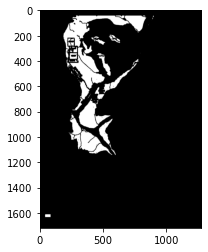

file_path: results\OG2_Fault_line.tif
[0 1] (1718, 1276, 3)


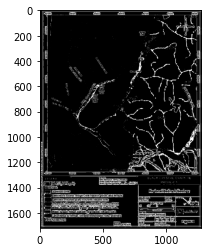

file_path: results\OG2_Kog_poly.tif
[0 1] (1718, 1276, 3)


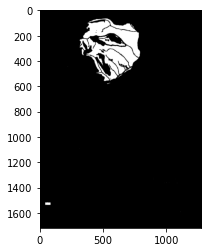

file_path: results\OG2_MJgr_poly.tif
[0] (1718, 1276, 3)


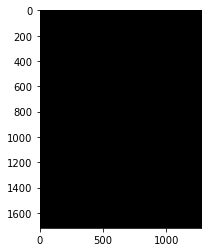

file_path: results\OG2_MJNgd_poly.tif
[0] (1718, 1276, 3)


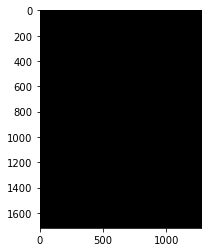

file_path: results\OG2_Peqm_poly.tif
[0 1] (1718, 1276, 3)


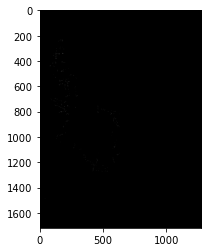

file_path: results\OG2_PeShgr_poly.tif
[0] (1718, 1276, 3)


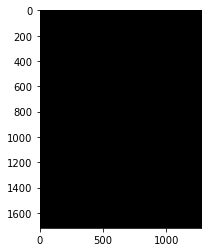

file_path: results\OG2_Qcr_poly.tif
[0] (1718, 1276, 3)


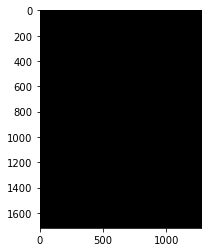

In [9]:
# Test; load and plot the produced rasters
for file_name in os.listdir('results'):
    file_path = os.path.join('results', file_name)
    print('file_path:', file_path)
    im=cv2.imread(file_path)
    print(np.unique(im), im.shape)
    im[np.where(im==1)]=255
    plt.imshow(im)
    plt.show()
    